In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-marketing-campaigns-dataset/bank-additional-full.csv


In [2]:
#import required basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
filename = '/kaggle/input/bank-marketing-campaigns-dataset/bank-additional-full.csv'
df = pd.read_csv(filename,sep=";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


**PRIMARY ANALYSIS OF CATEGORICAL FEATURES**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
#Numerical statistical summary
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
# Categorical statistical summary
df.describe(include=object)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


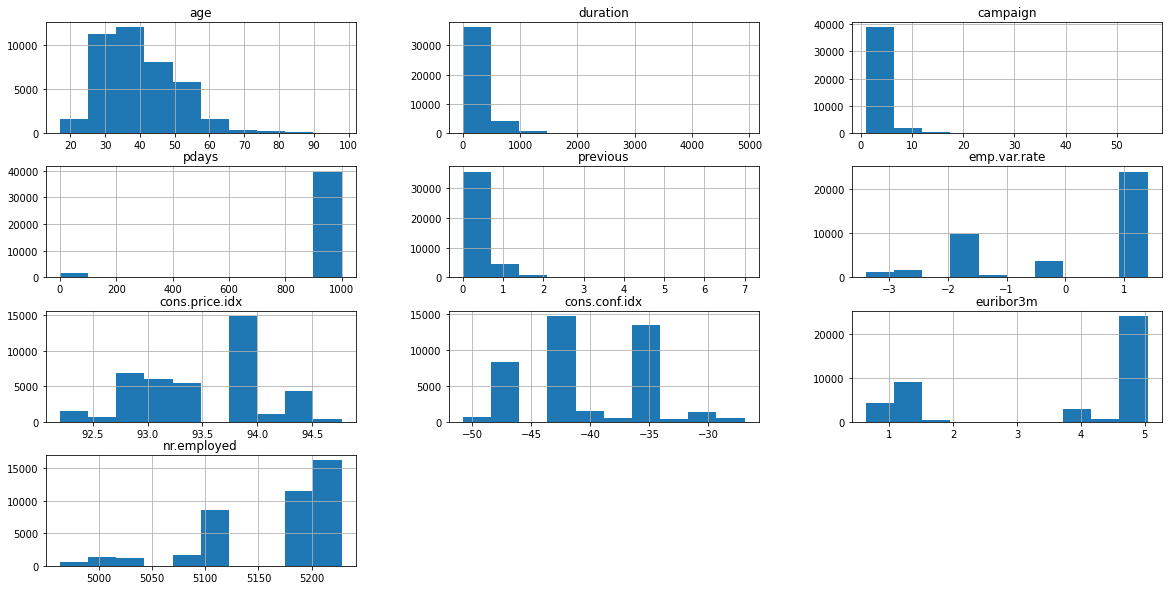

In [7]:
# Creating histogram
df.hist(figsize= [20,10])
plt.show()

Above primary analysis shows that:

1) the data covers age groups from 98 to 17 years with mean of 40 years;30% of the clients are graduates; 52% of clients have taken housing loan and 82% have no personal loan.

2) Target variable y is categorical and has two categories- 'Yes' or 'No', hence this is a Classification Project.These two categories can be converted to binary and thus label encoding it. Maximum category found is 'No'.

3) Other independent categorical variables- job, marital, education, default, housing, loan, contact, month, day_of_week, poutcome- can be one hot encoded

4) Based on count, there are no missing values as such

**MISSING VALUE ANALYSIS**

In [8]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

**LABEL ENCODING**

In [9]:
# Label encoding target variable
# converts label/words to numeric form without affecting dimensionality
# y- yes=1, no=0
df['y'] = df['y'].replace('yes', 1)
df['y'] = df['y'].replace('no', 0)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [10]:
# object datatypes are chosen as categorical datatypes
# one hot encoding represents the categorical variables as binary, increasing the dimensionality of the dataset
cat_col=[col for col in df.columns.values if df[col].dtype=='object']

# sepearting the numerical and categorical feature
df_cat=df[cat_col] 
df_num= df.drop(cat_col,axis=1)

In [11]:
#dummy encoding the categorical features
df_cat_dum= pd.get_dummies(df_cat,drop_first=True)

In [12]:
df_features=pd.concat([df_num,df_cat_dum], axis=1)

In [13]:
df_features.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0


In [14]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  int64  
 4   previous                       41188 non-null  int64  
 5   emp.var.rate                   41188 non-null  float64
 6   cons.price.idx                 41188 non-null  float64
 7   cons.conf.idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr.employed                    41188 non-null  float64
 10  y                              41188 non-null  int64  
 11  job_blue-collar                41188 non-null  uint8  
 12  job_entrepreneur               41188 non-null 

**FEATURE SELECTION USING RANDOM CLASSIFIER**

In [15]:
# splitting the data into 70% training data and 30% test data

from sklearn.model_selection import train_test_split

X = df_features.drop(['y'], axis=1)
y = df_features['y']

trainx, testx, trainy, testy = train_test_split(X, y, test_size=0.3, random_state=0)

In [16]:
# Use randomforest classifier

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
rfc.fit(trainx, trainy)

RandomForestClassifier(n_estimators=10000, n_jobs=-1, random_state=0)

In [17]:
# Print the name and gini importance of each feature
feat_labels = X.columns.values

feature_importance = []
for feature in zip(feat_labels, rfc.feature_importances_):
   
    feature_importance.append(feature)

In [18]:
feature_importance

[('age', 0.08618566386398764),
 ('duration', 0.29015602499077386),
 ('campaign', 0.04178199369579807),
 ('pdays', 0.03353857431900278),
 ('previous', 0.013738961767318078),
 ('emp.var.rate', 0.02341289011754231),
 ('cons.price.idx', 0.023455586654047598),
 ('cons.conf.idx', 0.026641943503223915),
 ('euribor3m', 0.10042013017159576),
 ('nr.employed', 0.052001436527475416),
 ('job_blue-collar', 0.00912955901482597),
 ('job_entrepreneur', 0.00408065698430441),
 ('job_housemaid', 0.0034507775674576468),
 ('job_management', 0.007619194267427778),
 ('job_retired', 0.006231741559246316),
 ('job_self-employed', 0.004297209231449068),
 ('job_services', 0.007059908897013911),
 ('job_student', 0.004545515313735655),
 ('job_technician', 0.011362997000859581),
 ('job_unemployed', 0.004234164752530876),
 ('job_unknown', 0.0017352275969970802),
 ('marital_married', 0.013703674878066122),
 ('marital_single', 0.011980118740034),
 ('marital_unknown', 0.0004681802865129859),
 ('education_basic.6y', 0.004

In [19]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.01
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(rfc, threshold=0.01)

# Train the selector
sfm.fit(trainx, trainy)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=10000, n_jobs=-1,
                                                 random_state=0),
                threshold=0.01)

In [20]:
# Print the names of the most important features
selected_features = []
for feature_list_index in sfm.get_support(indices=True):
    selected_features.append(feat_labels[feature_list_index])

In [21]:
selected_features

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'job_technician',
 'marital_married',
 'marital_single',
 'education_high.school',
 'education_university.degree',
 'housing_yes',
 'loan_yes',
 'contact_telephone',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_week_tue',
 'day_of_week_wed',
 'poutcome_success']

23 features have been selected using RandomForestClassifier for further modelling

In [22]:
data_selected = df_features[selected_features]
data_selected.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,education_high.school,education_university.degree,housing_yes,loan_yes,contact_telephone,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,1,1,0,0,0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,1,0,0,0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,1,0,1,1,0,0,0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,1,1,0,0,0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,1,1,1,0,0,0,0


In [23]:
data_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          41188 non-null  int64  
 1   duration                     41188 non-null  int64  
 2   campaign                     41188 non-null  int64  
 3   pdays                        41188 non-null  int64  
 4   previous                     41188 non-null  int64  
 5   emp.var.rate                 41188 non-null  float64
 6   cons.price.idx               41188 non-null  float64
 7   cons.conf.idx                41188 non-null  float64
 8   euribor3m                    41188 non-null  float64
 9   nr.employed                  41188 non-null  float64
 10  job_technician               41188 non-null  uint8  
 11  marital_married              41188 non-null  uint8  
 12  marital_single               41188 non-null  uint8  
 13  education_high.s

**STANDARDIZING THE DATA USING MINMAXSCALER**

Since the features have different ranges, it needs to be scaled for building a better model. MinMaxScaler of skcit library scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one. Default range is zero and one,which is being used below.

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data_selected)
data_standardised = scaler.fit_transform(data_selected)

In [25]:
data_std= pd.DataFrame(data_standardised)
data_std.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.481481,0.053070,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0.493827,0.030297,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,0.246914,0.045954,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,0.283951,0.030704,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,0.481481,0.062424,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0


In [26]:
data_std.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       41188 non-null  float64
 1   1       41188 non-null  float64
 2   2       41188 non-null  float64
 3   3       41188 non-null  float64
 4   4       41188 non-null  float64
 5   5       41188 non-null  float64
 6   6       41188 non-null  float64
 7   7       41188 non-null  float64
 8   8       41188 non-null  float64
 9   9       41188 non-null  float64
 10  10      41188 non-null  float64
 11  11      41188 non-null  float64
 12  12      41188 non-null  float64
 13  13      41188 non-null  float64
 14  14      41188 non-null  float64
 15  15      41188 non-null  float64
 16  16      41188 non-null  float64
 17  17      41188 non-null  float64
 18  18      41188 non-null  float64
 19  19      41188 non-null  float64
 20  20      41188 non-null  float64
 21  21      41188 non-null  float64
 22

**BUILDING SUPERVISED MODELS**

In [27]:
X= data_std

In [28]:
X.shape

(41188, 23)

In [29]:
y= pd.DataFrame(df_features['y'])

In [30]:
y.shape

(41188, 1)

In [31]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   y       41188 non-null  int64
dtypes: int64(1)
memory usage: 321.9 KB


In [32]:
# spilting the dataset into training and testing
trainx, testx, trainy, testy = train_test_split(X, y, test_size = 0.30, random_state=10)

print("trainx ",trainx.shape)

print("testx ",testx.shape)

print("trainy ",trainy.shape)

print("testy ",testy.shape)

trainx  (28831, 23)
testx  (12357, 23)
trainy  (28831, 1)
testy  (12357, 1)


**SIMPLE LOGISTIC REGRESSION**

In [33]:
# logistic regression performs binary classifications, and gives probability output
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
log_reg_model = sm.Logit(trainy, trainx).fit()
print(log_reg_model.summary())

Optimization terminated successfully.
         Current function value: 0.212454
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                28831
Model:                          Logit   Df Residuals:                    28808
Method:                           MLE   Df Model:                           22
Date:                Mon, 23 May 2022   Pseudo R-squ.:                  0.3928
Time:                        07:11:46   Log-Likelihood:                -6125.3
converged:                       True   LL-Null:                       -10087.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
0              0.3918      0.182      2.153      0.031       0.035       0.748
1             22.5210      0.

It is noticed that 8 iterations were performed. p value near zero or low indicates the model is statistically alright. Moving forward with prediicting y and then evaluation matrix

In [34]:
# let 'y_pred_prob' be the predicted values of y
y_pred_prob = log_reg_model.predict(testx)

# print the y_pred_prob
y_pred_prob.head()

29773    0.062592
14070    0.068129
39364    0.450767
29279    0.061301
11888    0.003388
dtype: float64

In [35]:
# convert probabilities to 0 and 1 using 'if_else'
predy = ['0' if x < 0.5 else '1' for x in y_pred_prob]
# convert the predicted values to type 'float32'
predy = np.array(predy, dtype=np.float32)

# print the first five predictions
predy[0:5]

array([0., 0., 0., 0., 0.], dtype=float32)

The above process of considering probability is done because confusion matrix doesnot provide result when continuos and binary data is fed into it.

In [36]:
# Evaluation Metrics 1- Confusion matrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
cf1=pd.DataFrame(confusion_matrix(testy,predy),columns=['Predicted 0','Predicted 1'], index =['Actual 0','Actual 1'])
cf1

,Predicted 0,Predicted 1
Actual 0,10657,278
Actual 1,859,563


In [37]:
# Evaluation Metrics 2- Accuracy using Classification Report
from sklearn.metrics import classification_report
test_report1 = classification_report(testy,predy)
print(test_report1)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10935
           1       0.67      0.40      0.50      1422

    accuracy                           0.91     12357
   macro avg       0.80      0.69      0.72     12357
weighted avg       0.90      0.91      0.90     12357



In [38]:
# Evaluation Metrics 3- Cohen value using Kappa score
from sklearn.metrics import cohen_kappa_score
kappa_value1 = cohen_kappa_score(testy, predy)
print(kappa_value1)

0.45057636476835083


Text(0.02, 0.9, "('AUC Score:', 0.9248)")

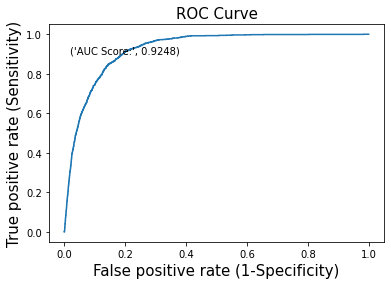

In [39]:
# Evaluation metrics 4- Plot the ROC curve to get AUC score

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(testy,y_pred_prob)
plt.plot(fpr, tpr)

plt.title('ROC Curve', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(testy, y_pred_prob),4)))

In [40]:
# tabulate the results
score_card = pd.DataFrame(columns=['Model', 'AUC Score', 'Precision Score', 'Recall Score', 'Accuracy Score',
                                   'Kappa Score', 'f1-score'])
score_card = score_card.append({'Model': 'Logistic Regresion',
                                    'AUC Score' : roc_auc_score(testy, y_pred_prob),
                                    'Precision Score': metrics.precision_score(testy, predy),
                                    'Recall Score': metrics.recall_score(testy, predy),
                                    'Accuracy Score': metrics.accuracy_score(testy, predy),
                                    'Kappa Score': cohen_kappa_score(testy, predy),
                                    'f1-score': metrics.f1_score(testy, predy)}, 
                                    ignore_index = True)
score_card

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regresion,0.924839,0.669441,0.395921,0.907987,0.450576,0.49757


**ADABOOST**

In [41]:
from sklearn.ensemble import AdaBoostClassifier

# build the model
adaboost = AdaBoostClassifier(random_state=10)
# fit the model
adaboost.fit(trainx, trainy)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(random_state=10)

In [42]:
y_pred_adaboost = adaboost.predict(testx)

In [43]:
# Evaluation Metrics 1- Confusion matrics
cf2=pd.DataFrame(confusion_matrix(testy,y_pred_adaboost),columns=['Predicted 0','Predicted 1'], index =['Actual 0','Actual 1'])
cf2

,Predicted 0,Predicted 1
Actual 0,10688,247
Actual 1,915,507


In [44]:
# Evaluation Metrics 2- Accuracy using Classification Report
test_report2 = classification_report(testy,y_pred_adaboost)
print(test_report2)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10935
           1       0.67      0.36      0.47      1422

    accuracy                           0.91     12357
   macro avg       0.80      0.67      0.71     12357
weighted avg       0.89      0.91      0.89     12357



In [45]:
# Evaluation Metrics 3- Cohen value using Kappa score
kappa_value2 = cohen_kappa_score(testy, y_pred_adaboost)
print(kappa_value2)

0.4197151070930797


Text(0.02, 0.9, "('AUC Score:', 0.667)")

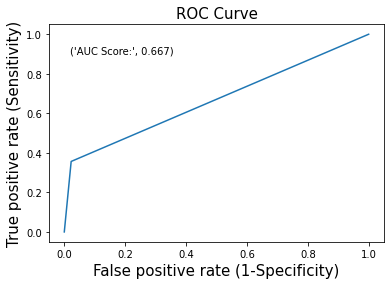

In [46]:
# Evaluation metrics 4- Plot the ROC curve to get AUC score
fpr, tpr, thresholds = roc_curve(testy, y_pred_adaboost)
plt.plot(fpr, tpr)

plt.title('ROC Curve', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(testy, y_pred_adaboost),4)))

In [47]:
adaboost_metrics = pd.Series({'Model': "AdaBoost",
                     'AUC Score' : metrics.roc_auc_score(testy, y_pred_adaboost),
                 'Precision Score': metrics.precision_score(testy, y_pred_adaboost),
                 'Recall Score': metrics.recall_score(testy, y_pred_adaboost),
                 'Accuracy Score': metrics.accuracy_score(testy, y_pred_adaboost),
                 'Kappa Score': cohen_kappa_score(testy, y_pred_adaboost),
                  'f1-score':metrics.f1_score(testy, y_pred_adaboost)})
score_card = score_card.append(adaboost_metrics , ignore_index = True)
score_card

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regresion,0.924839,0.669441,0.395921,0.907987,0.450576,0.497570
1,AdaBoost,0.666976,0.672414,0.356540,0.905964,0.419715,0.465993


**K-NEAREST NEIGHBOUR(KNN)**

In [48]:
# KNN is classification algorithm that provides class output, default value of n-neighbours = 5
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(n_neighbors=5).fit(trainx,trainy.values.ravel())

In [49]:
predy=knn_model.predict(testx)

In [50]:
# Evaluation Metrics 1- Confusion matrics
cf3=pd.DataFrame(confusion_matrix(testy,predy),columns=['Predicted 0','Predicted 1'], index =['Actual 0','Actual 1'])
cf3

,Predicted 0,Predicted 1
Actual 0,10631,304
Actual 1,1050,372


In [51]:
# Evaluation Metrics 2- Accuracy using Classification Report
test_report3 = classification_report(testy,predy)
print(test_report3)

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     10935
           1       0.55      0.26      0.35      1422

    accuracy                           0.89     12357
   macro avg       0.73      0.62      0.65     12357
weighted avg       0.87      0.89      0.87     12357



In [52]:
# Evaluation Metrics 3- Cohen value using Kappa score
kappa_value3 = cohen_kappa_score(testy, predy)
print(kappa_value3)

0.3029301768545051


Text(0.02, 0.9, "('AUC Score:', 0.6169)")

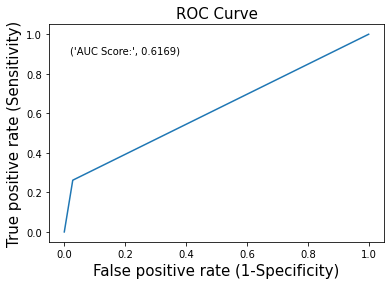

In [53]:
# Evaluation metrics 4- Plot the ROC curve to get AUC score
fpr, tpr, thresholds = roc_curve(testy, predy)
plt.plot(fpr, tpr)

plt.title('ROC Curve', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(testy, predy),4)))

In [54]:
knn_metrics = pd.Series({'Model': "KNN",
                     'AUC Score' : metrics.roc_auc_score(testy, predy),
                 'Precision Score': metrics.precision_score(testy, predy),
                 'Recall Score': metrics.recall_score(testy, predy),
                 'Accuracy Score': metrics.accuracy_score(testy,predy),
                 'Kappa Score': cohen_kappa_score(testy, predy),
                  'f1-score':metrics.f1_score(testy, predy)})
score_card = score_card.append(knn_metrics , ignore_index = True)
score_card

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regresion,0.924839,0.669441,0.395921,0.907987,0.450576,0.497570
1,AdaBoost,0.666976,0.672414,0.356540,0.905964,0.419715,0.465993
2,KNN,0.616901,0.550296,0.261603,0.890426,0.302930,0.354623


**SUPPORT VECTOR MACHINE(SVM)**

In [55]:
# provides class output
from sklearn.svm import SVC
from sklearn import linear_model
svm_lin_model= SVC(kernel='linear').fit(trainx,trainy.values.ravel())

In [56]:
predy=svm_lin_model.predict(testx)

In [57]:
# Evaluation Metrics 1- Confusion matrics
cf4=pd.DataFrame(confusion_matrix(testy,predy),columns=['Predicted 0','Predicted 1'], index =['Actual 0','Actual 1'])
cf4

,Predicted 0,Predicted 1
Actual 0,10750,185
Actual 1,1091,331


In [58]:
# Evaluation Metrics 2- Accuracy using Classification Report
test_report4 = classification_report(testy,predy)
print(test_report4)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     10935
           1       0.64      0.23      0.34      1422

    accuracy                           0.90     12357
   macro avg       0.77      0.61      0.64     12357
weighted avg       0.88      0.90      0.87     12357



In [59]:
# Evaluation Metrics 3- Cohen value using Kappa score
kappa_value4 = cohen_kappa_score(testy, predy)
print(kappa_value4)

0.29860862560843104


Text(0.02, 0.9, "('AUC Score:', 0.6079)")

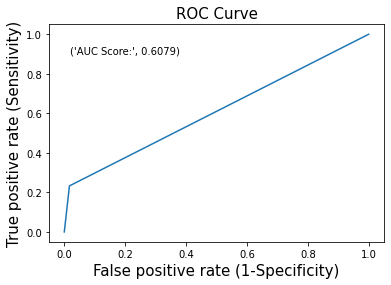

In [60]:
# Evaluation metrics 4- Plot the ROC curve to get AUC score
fpr, tpr, thresholds = roc_curve(testy, predy)
plt.plot(fpr, tpr)

plt.title('ROC Curve', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(testy, predy),4)))

In [61]:
svm_metrics = pd.Series({'Model': "SVM",
                     'AUC Score' : metrics.roc_auc_score(testy, predy),
                 'Precision Score': metrics.precision_score(testy, predy),
                 'Recall Score': metrics.recall_score(testy, predy),
                 'Accuracy Score': metrics.accuracy_score(testy,predy),
                 'Kappa Score': cohen_kappa_score(testy, predy),
                  'f1-score':metrics.f1_score(testy, predy)})
score_card = score_card.append(svm_metrics , ignore_index = True)
score_card

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regresion,0.924839,0.669441,0.395921,0.907987,0.450576,0.497570
1,AdaBoost,0.666976,0.672414,0.356540,0.905964,0.419715,0.465993
2,KNN,0.616901,0.550296,0.261603,0.890426,0.302930,0.354623
3,SVM,0.607926,0.641473,0.232771,0.896739,0.298609,0.341589


AUC score of Logistic Regression is high which makes it a good model for prediction.
But higher precision, recall, accuracy, kappa and f1 score makes Adaboost the better model in comparision with all the others.